You will find an attached excel file, W06-IrisData.xls, in the assignment
package, which contains the four features, i.e., Sepal Length, Sepal Width,
Petal Length, and Petal Width, of 150 samples from three categories of
irises (50 samples per category)

In this assignment, you are required to write code using Python, to
implement a single layer perceptron to classify `Versicolor` and `Virginica`,
using all four features. When submitting the answer sheet, you shall paste
your Python code, tables presenting results, and **figures visualization the
development of classification accuracy in terms of epochs**.

1) Write the code to read the whole Iris Dataset and extract all the
features for all of the 100 samples of Versicolor and Virginica. Set the
ground truth label of Versicolor as 1 and Virginica as -1. For each
category of them, use the first 40 samples as the training set and the
remaining 10 samples as the test set. Normalize the features of both
the training set and the test set, such that the mean of each feature is
0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('W06-IrisData.csv')

In [3]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# df[50:100]

In [5]:
# df[100:150]

### Set the ground truth label of Versicolor as 1 and Virginica as -1

In [6]:
y_name = df.iloc[50:150, 5].values
np.unique(y_name)

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
y_label = np.where(y_name == 'Iris-versicolor', 1, -1)

In [8]:
y_label

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### use the first 40 samples as the training set and the remaining 10 samples as the test set

In [9]:
X = df.iloc[50:150, [1, 2, 3, 4]].values.astype('float')

In [10]:
Iris_versicolor_train = np.asarray(X[0:40])
Iris_versicolor_test = np.asarray(X[40:50])
Iris_versicolor_train_y_label = np.asarray(y_label[0:40])
Iris_versicolor_test_y_label = np.asarray(y_label[40:50])

In [11]:
Iris_virginica_train = np.asarray(X[50:90])
Iris_virginica_test = np.asarray(X[90:100])
Iris_virginica_train_y_label = np.asarray(y_label[50:90])
Iris_virginica_test_y_label = np.asarray(y_label[90:100])

In [12]:
training_set = np.concatenate((Iris_versicolor_train, 
                               Iris_virginica_train))
training_set_y_label = np.concatenate((Iris_versicolor_train_y_label, 
                               Iris_virginica_train_y_label))

In [13]:
test_set = np.concatenate((Iris_versicolor_test, 
                           Iris_virginica_test))
test_set_y_label = np.concatenate((Iris_versicolor_test_y_label, 
                                   Iris_virginica_test_y_label))

### Normalize the features of both the training set and the test set, such that the mean of each feature is 0.

In [14]:
training_set_std = np.copy(training_set)
training_set_std = (training_set - training_set.mean()) / training_set.std()

In [15]:
test_set_std = np.copy(test_set)
test_set_std = (test_set - test_set.mean()) / test_set.std()

2) **From the above task description, what are the input dimension and
output dimension of the single layer perceptron?** 

**Answer:**  input dimension (4,1) and output dimension (1,1)

**How many weights
and biases do you need to build this single layer perceptron?**

**Answer:** 4 weights and 1 biases

3) Build the single layer perceptron according to the answer of Q2.
**Randomly initialize the values of weights w and bias t (ensure that the
value of w and t are sampled from a standard normal distribution with
0 mean and 1 std) and print out the exact values of them**. Use the given
activation function and write the code to calculate the output value of
the
sample
**(SepalLengthCm=7,
SepalWidthCm=3.2,
PetalLengthCm=4.7, PetalWidthCm=1.4)**. Explain what would happen
when initializing the values of all **w** and **b** as 0.

![](images/1.png)

In [16]:
X = np.array([7, 3.2, 4.7, 1.4])
X

array([7. , 3.2, 4.7, 1.4])

In [17]:
W = np.array([0.3, 0.3, 0.3, 0.3])
W

array([0.3, 0.3, 0.3, 0.3])

In [18]:
t  = 0.4

In [19]:
np.dot(X, W) + t

5.29

### with initial weights and bias

In [20]:
X = np.array([7, 3.2, 4.7, 1.4])
X

array([7. , 3.2, 4.7, 1.4])

In [21]:
rgen = np.random.RandomState(1)
init_W = rgen.normal(loc=0.0, scale=1, size=X.shape[0])
init_t = rgen.normal(loc=0.0, scale=1, size=X.shape[0])
print(f'init weights: {init_W}\ninit bias: {init_t}')

init weights: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
init bias: [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]


In [22]:
y_pred = np.dot(X, init_W) + init_t
y_pred

array([6.29364134, 3.12669502, 7.17304548, 4.66702681])

In [23]:
def activation(sigma):
    return np.where(sigma>=0, 1, -1)

In [24]:
y_pred_activation = activation(y_pred)
y_pred_activation

array([1, 1, 1, 1])

### without initial weights and bias

In [25]:
X = np.array([7, 3.2, 4.7, 1.4])
X

array([7. , 3.2, 4.7, 1.4])

In [26]:
init_W = 0
init_t = 0
print(f'init weights: {init_W}\ninit bias: {init_t}')

init weights: 0
init bias: 0


In [27]:
y_pred = np.dot(X, init_W) + init_t
y_pred

array([0., 0., 0., 0.])

4) Train the single layer perceptron for **5 epochs** according to the
following updating formulas. Grid-search the (at least 3) **learning rate
r ranging from 0.001 to 0.01** and find the optimum one. For each
learning rate r , you are required to calculate the **classification accuracy**
of the training set and the test set for each epoch, **plot it in a figure and
present it in a tabl**e. Discuss the effects of different learning rates on
the training and performance of the perceptron.
![](images/2.png)

In [28]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=5, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state

    
    def fit(self, X, Y, X_test, Y_test):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        
        """
        self.init_weights(X)
        
        self.train_acc = []
        self.test_acc = []
        
        self.train_losses = []
        self.test_losses = []
        
        for _ in range(self.epochs):
            
            train_correct = 0
            test_correct = 0
            
            train_loss = 0
            test_loss = 0
            
            train_size = len(X) * 4
            test_size = len(X_test) * 4
            
            
            for x, y in zip(X, Y):
                
                y_pred = self.activation(np.dot(x, self.w) + self.t)
                
                w_new = self.w + self.lr * (y - y_pred) * x
                t_new = self.t + self.lr * (y - y_pred)
                self.w = w_new
                self.t = t_new
                
                errors = y - y_pred
                loss = (errors**2).mean()
                
                train_loss += loss
                train_correct += np.sum(y_pred == y)
                
            train_correct /= train_size
            train_loss /= train_size
            
            self.train_losses.append(train_loss)
            self.train_acc.append(train_correct)
            
             
            
            
            for x, y in zip(X_test, Y_test):
                y_pred = self.activation(np.dot(x, self.w) + self.t)
                
                w_new = self.w + self.lr * (y - y_pred) * x
                t_new = self.t + self.lr * (y - y_pred)
                self.w = w_new
                self.t = t_new
                
                errors = y - y_pred
                loss = (errors**2).mean()
                
                test_loss += loss
                test_correct += np.sum(y_pred == y)
                
            test_correct /= test_size
            test_loss /= test_size
            
            self.test_losses.append(test_loss)
            self.test_acc.append(test_correct)
            print(f"train_accuracy: {(100*train_correct):>0.1f}% | train_loss: {train_loss:>8f} | test_accuracy: {(100*test_correct):>0.1f}% | test_loss: {test_loss:>8f} \n")  
            
        return self.train_acc, self.train_losses, self.test_acc, self.test_losses
    
    def activation(self, sigma):
        return np.where(sigma>=0, 1, -1)
    
    def init_weights(self, X):
        # Randomly initialize the values of weights w and bias t 
        # (ensure that the value of w and t are sampled from 
        # a standard normal distribution with 0 mean and 1 std)
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=1, size=X.shape[1])
        self.t = rgen.normal(loc=0.0, scale=1, size=X.shape[1])
        print(f'init weights: {self.w}\ninit bias: {self.t}\n')

In [29]:
iris = Perceptron(lr=0.001,epochs=5).fit(training_set_std, training_set_y_label, test_set_std, test_set_y_label)

init weights: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
init bias: [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]

train_accuracy: 50.3% | train_loss: 0.496875 | test_accuracy: 50.0% | test_loss: 0.500000 

train_accuracy: 52.5% | train_loss: 0.475000 | test_accuracy: 56.2% | test_loss: 0.437500 

train_accuracy: 56.9% | train_loss: 0.431250 | test_accuracy: 61.3% | test_loss: 0.387500 

train_accuracy: 58.1% | train_loss: 0.418750 | test_accuracy: 55.0% | test_loss: 0.450000 

train_accuracy: 53.8% | train_loss: 0.462500 | test_accuracy: 55.0% | test_loss: 0.450000 



In [30]:
pd.DataFrame({
    'train_accuracy': iris[0],
    'train_loss': iris[1],
    'test_accuracy': iris[2],
    'test_loss': iris[3]
})

,train_accuracy,train_loss,test_accuracy,test_loss
0,0.503125,0.496875,0.5000,0.5000
1,0.525000,0.475000,0.5625,0.4375
2,0.568750,0.431250,0.6125,0.3875
3,0.581250,0.418750,0.5500,0.4500
4,0.537500,0.462500,0.5500,0.4500


Text(0.5, 1.0, 'learning rate 0.001')

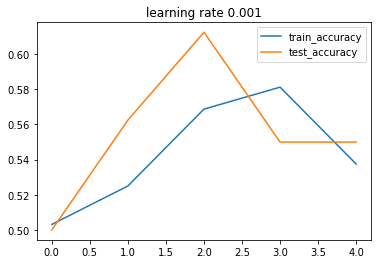

In [31]:
plt.plot(iris[0], label='train_accuracy')
# plt.plot(iris[1], label='train_loss')
plt.plot(iris[2], label='test_accuracy')
# plt.plot(iris[3], label='test_loss')
plt.legend()
plt.title('learning rate 0.001')

Text(0.5, 1.0, 'learning rate 0.001')

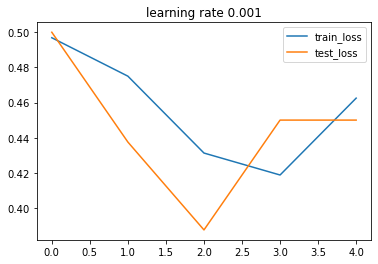

In [32]:
# plt.plot(iris[0], label='train_accuracy')
plt.plot(iris[1], label='train_loss')
# plt.plot(iris[2], label='test_accuracy')
plt.plot(iris[3], label='test_loss')
plt.legend()
plt.title('learning rate 0.001')

In [33]:
iris = Perceptron(lr=0.01,epochs=5).fit(training_set_std, training_set_y_label, test_set_std, test_set_y_label)

init weights: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
init bias: [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]

train_accuracy: 63.4% | train_loss: 0.365625 | test_accuracy: 63.7% | test_loss: 0.362500 

train_accuracy: 73.8% | train_loss: 0.262500 | test_accuracy: 85.0% | test_loss: 0.150000 

train_accuracy: 83.4% | train_loss: 0.165625 | test_accuracy: 96.2% | test_loss: 0.037500 

train_accuracy: 87.5% | train_loss: 0.125000 | test_accuracy: 97.5% | test_loss: 0.025000 

train_accuracy: 89.7% | train_loss: 0.103125 | test_accuracy: 97.5% | test_loss: 0.025000 



In [34]:
pd.DataFrame({
    'train_accuracy': iris[0],
    'train_loss': iris[1],
    'test_accuracy': iris[2],
    'test_loss': iris[3]
})

,train_accuracy,train_loss,test_accuracy,test_loss
0,0.634375,0.365625,0.6375,0.3625
1,0.737500,0.262500,0.8500,0.1500
2,0.834375,0.165625,0.9625,0.0375
3,0.875000,0.125000,0.9750,0.0250
4,0.896875,0.103125,0.9750,0.0250


Text(0.5, 1.0, 'learning rate 0.01')

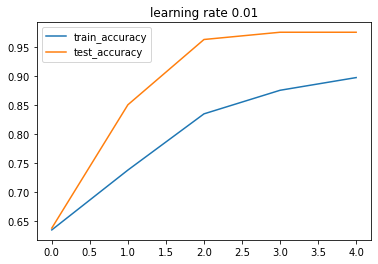

In [35]:
plt.plot(iris[0], label='train_accuracy')
# plt.plot(iris[1], label='train_loss')
plt.plot(iris[2], label='test_accuracy')
# plt.plot(iris[3], label='test_loss')
plt.legend()
plt.title('learning rate 0.01')

Text(0.5, 1.0, 'learning rate 0.01')

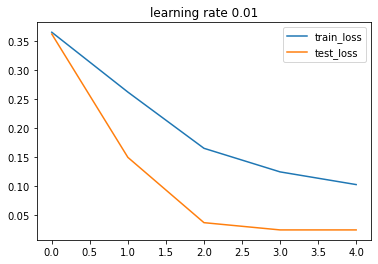

In [36]:
# plt.plot(iris[0], label='train_accuracy')
plt.plot(iris[1], label='train_loss')
# plt.plot(iris[2], label='test_accuracy')
plt.plot(iris[3], label='test_loss')
plt.legend()
plt.title('learning rate 0.01')